# Análisis de captura de sensor 9DoF MPU9250

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np

In [143]:
df = pd.read_csv("data/mpu9250.csv")
df.head()

,ax,ay,az,gx,gy,gz,mag_valid,mx,my,mz,Unnamed: 10
0,-172,-229,16605,-7,-93,100,1,-108,-300,310.0,NaN
1,-170,-225,16593,-9,-93,103,1,-108,-302,304.0,NaN
2,28,16604,-9,-91,103,1,-108,-304,308,NaN,NaN
3,-172,-229,16605,-7,-93,100,1,-108,-300,310.0,NaN
4,-170,-225,16593,-9,-93,103,1,-108,-302,304.0,NaN


Get rid of last column with NaNs.

In [144]:
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df.head()

,ax,ay,az,gx,gy,gz,mag_valid,mx,my,mz
0,-172,-229,16605,-7,-93,100,1,-108,-300,310.0
1,-170,-225,16593,-9,-93,103,1,-108,-302,304.0
2,28,16604,-9,-91,103,1,-108,-304,308,NaN
3,-172,-229,16605,-7,-93,100,1,-108,-300,310.0
4,-170,-225,16593,-9,-93,103,1,-108,-302,304.0


Remove invalid magnetometer readings

In [145]:
df = df[df["mag_valid"]==1]
df.head()

,ax,ay,az,gx,gy,gz,mag_valid,mx,my,mz
0,-172,-229,16605,-7,-93,100,1,-108,-300,310.0
1,-170,-225,16593,-9,-93,103,1,-108,-302,304.0
3,-172,-229,16605,-7,-93,100,1,-108,-300,310.0
4,-170,-225,16593,-9,-93,103,1,-108,-302,304.0
5,-163,-230,16591,-10,-92,104,1,-102,-300,298.0


Drop rows with NaNs.

In [146]:
df.dropna()
df.head()

,ax,ay,az,gx,gy,gz,mag_valid,mx,my,mz
0,-172,-229,16605,-7,-93,100,1,-108,-300,310.0
1,-170,-225,16593,-9,-93,103,1,-108,-302,304.0
3,-172,-229,16605,-7,-93,100,1,-108,-300,310.0
4,-170,-225,16593,-9,-93,103,1,-108,-302,304.0
5,-163,-230,16591,-10,-92,104,1,-102,-300,298.0


Finally, drop column with magnetometer valid flag.

In [147]:
df = df.drop(columns=['mag_valid'])
df.head()

,ax,ay,az,gx,gy,gz,mx,my,mz
0,-172,-229,16605,-7,-93,100,-108,-300,310.0
1,-170,-225,16593,-9,-93,103,-108,-302,304.0
3,-172,-229,16605,-7,-93,100,-108,-300,310.0
4,-170,-225,16593,-9,-93,103,-108,-302,304.0
5,-163,-230,16591,-10,-92,104,-102,-300,298.0


In [148]:
df.shape

(3962, 9)

## Magnetometer

Convert magnetometer values to mGauss.

In [149]:
df = df.apply(lambda x: x * (4912/32760) * 10.0 if x.name in ['mx', 'my','mz'] else x, axis=1)

Text(0.5,1,'Magnetómetro sin calibrar [mG]')

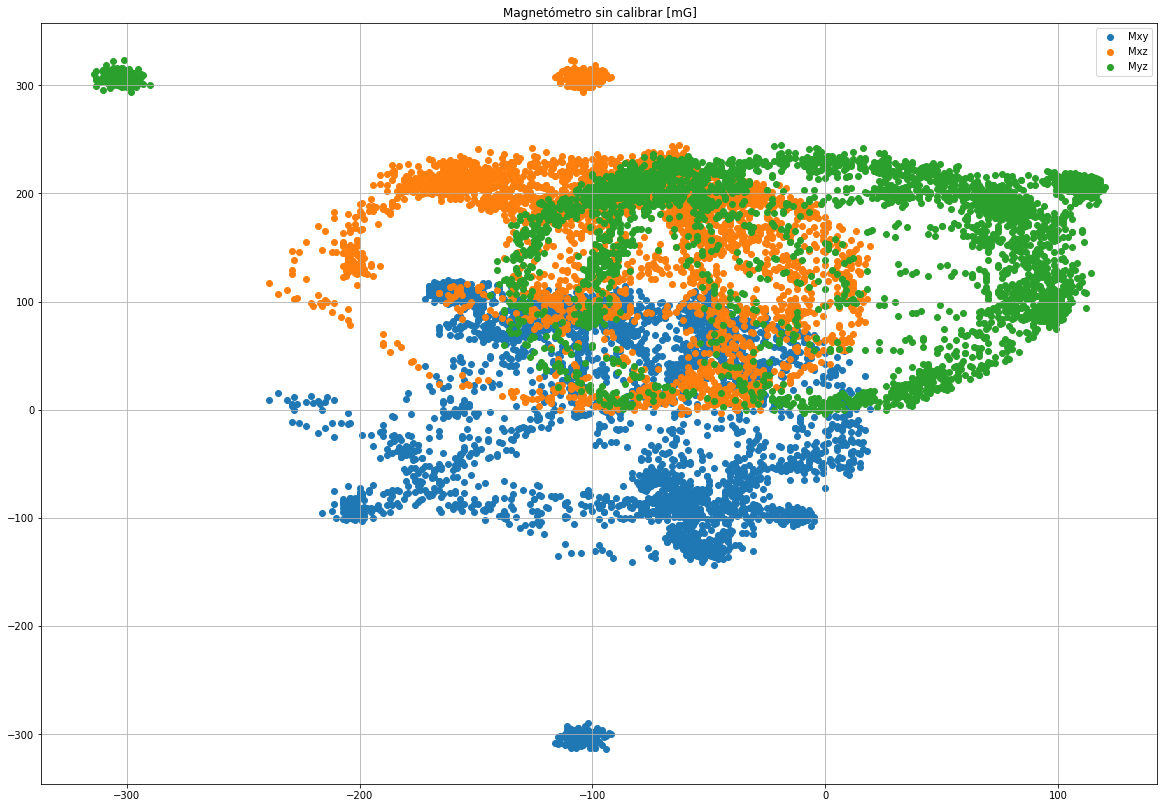

In [150]:
mx = df.values[:,6] 
my = df.values[:,7]
mz = df.values[:,8]

fig = plt.figure(figsize=(20, 14))
plt.grid(which='Both')
plt.scatter(mx,my)
plt.scatter(mx,mz)
plt.scatter(my,mz)
plt.legend(["Mxy","Mxz","Myz"])
plt.title("Magnetómetro sin calibrar [mG]")

Remove outliers

In [151]:
df_filtered = df[(df.my<270)]
df_filtered =  df[(df_filtered.mz<270)]

Text(0.5,1,'Magnetómetro sin calibrar [mG]')

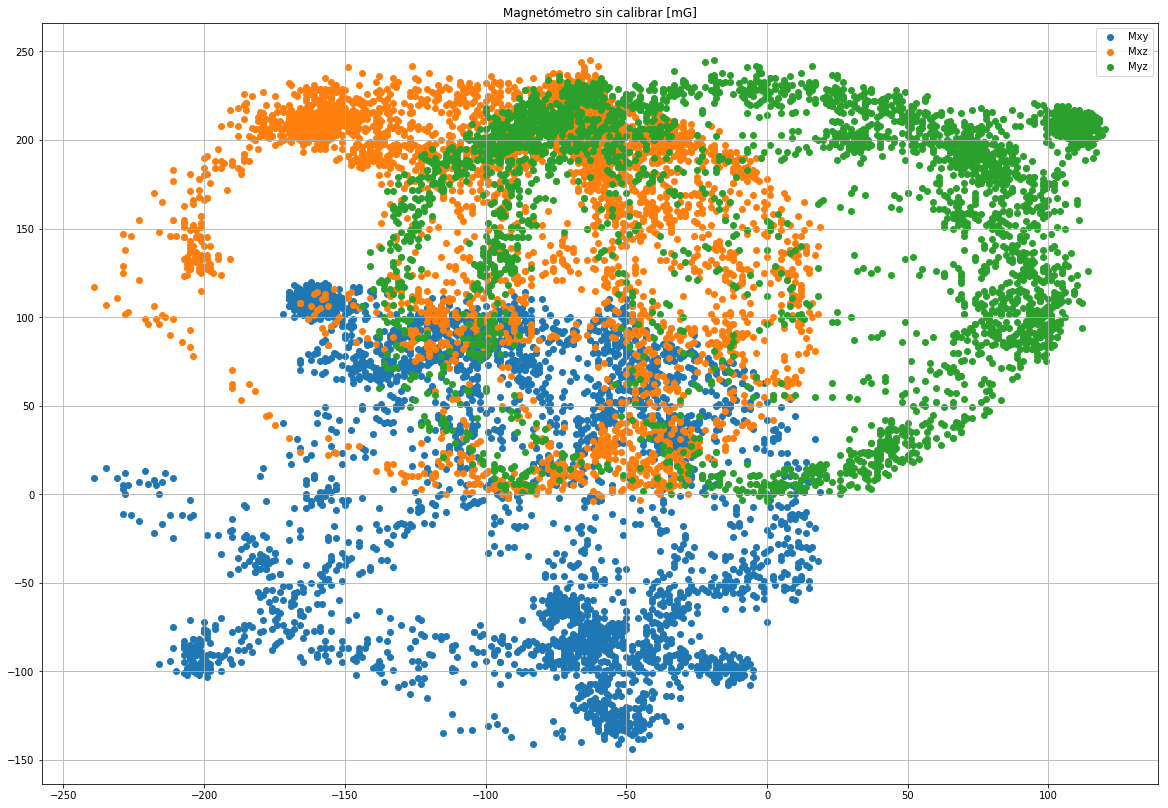

In [152]:
mx = df_filtered.values[:,6] 
my = df_filtered.values[:,7]
mz = df_filtered.values[:,8]

fig = plt.figure(figsize=(20, 14))
plt.grid(which='Both')
plt.scatter(mx,my)
plt.scatter(mx,mz)
plt.scatter(my,mz)
plt.legend(["Mxy","Mxz","Myz"])
plt.title("Magnetómetro sin calibrar [mG]")

Apply correction

In [153]:
corr_x = (mx.min() + mx.max())/2
corr_y = (my.min() + my.max())/2
corr_z = (mz.min() + mz.max())/2
corr_x,corr_y,corr_z

(-110.0, -12.0, 120.5)

Text(0.5,1,'Magnetómetro sin calibrar [mG]')

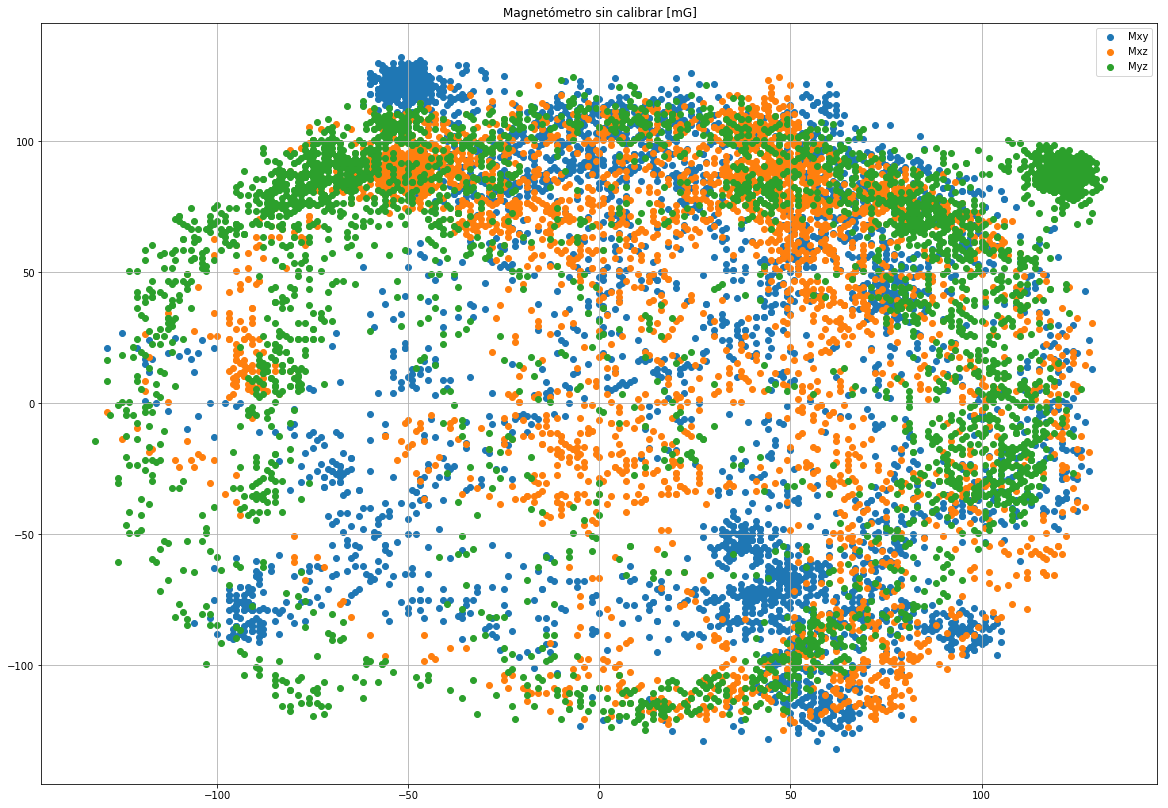

In [154]:
mx_corr = (df_filtered.values[:,6] - corr_x)*1.0
my_corr = (df_filtered.values[:,7] - corr_y)*1.0
mz_corr = (df_filtered.values[:,8] - corr_z)*1.0

fig = plt.figure(figsize=(20, 14))
plt.grid(which='Both')
plt.scatter(mx_corr,my_corr)
plt.scatter(mx_corr,mz_corr)
plt.scatter(my_corr,mz_corr)
plt.legend(["Mxy","Mxz","Myz"])
plt.title("Magnetómetro sin calibrar [mG]")

## Gyroscope integration

In [155]:
t = np.arange(ax.shape[0])

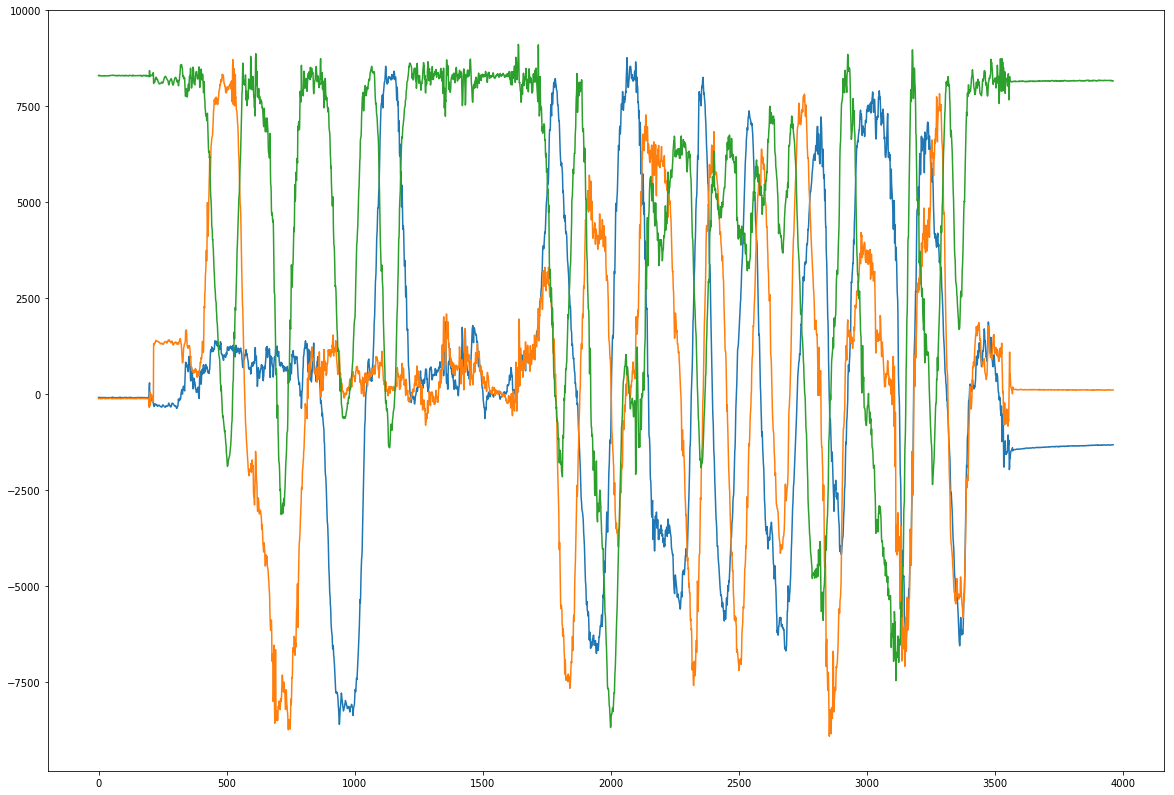

In [156]:
fig = plt.figure(figsize=(20, 14))
plt.plot(t,ax,t,ay,t,az)

In [157]:
gx = df.values[:,3] / 131.0
gy = df.values[:,4] / 131.0
gz = df.values[:,5] / 131.0

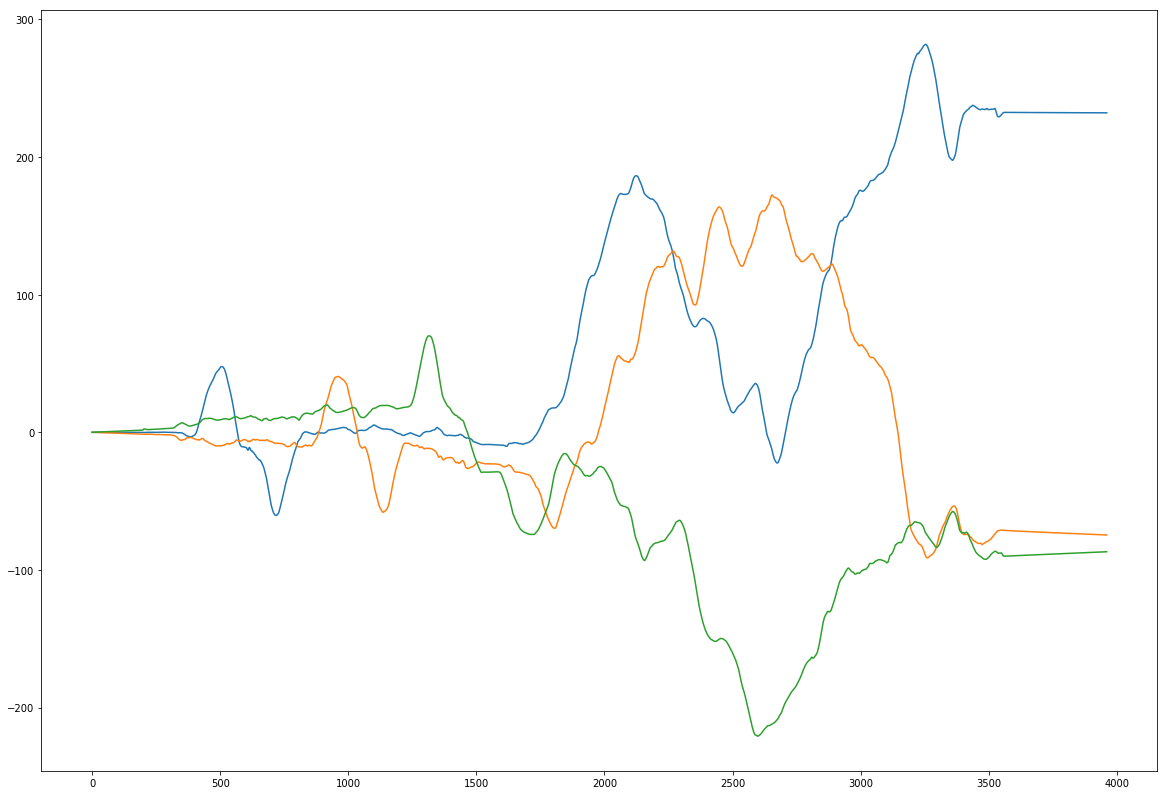

In [158]:
gxi = np.zeros(gx.shape)
for i in range(1,gxi.shape[0]):
    gxi[i]=gxi[i-1]+gx[i]*0.01

gyi = np.zeros(gy.shape)
for i in range(1,gyi.shape[0]):
    gyi[i]=gyi[i-1]+gy[i]*0.01
    
gzi = np.zeros(gz.shape)
for i in range(1,gzi.shape[0]):
    gzi[i]=gzi[i-1]+gz[i]*0.01    

fig = plt.figure(figsize=(20, 14))
plt.plot(t,gxi,t,gyi,t,gzi)

## Accelerometer

In [159]:
G = 9806.65

In [160]:
ACCELEROMETER_SCALE = 100/(2*G)
ACCELEROMETER_SCALE

0.005098581064889641

In [161]:
max(df.values[:,2]/2.0)

9113.0

In [162]:
ax = df.values[:,0] / 2.0
ay = df.values[:,1] / 2.0
az = df.values[:,2] / 2.0
print(min(-ax/G),max(-ax/G))
print(min(-ay/G),max(-ay/G))
print(min(-az/G),max(-az/G))

-0.8938322464858031 0.877108900592965
-0.8888866228528601 0.9084651741420363
-0.9292673848867861 0.8853176161074373


In [167]:
pitch = 180*np.arcsin(-ax/G)
roll = 180*np.arctan2(ay,az)

Text(0,0.5,'Rotation(degrees)')

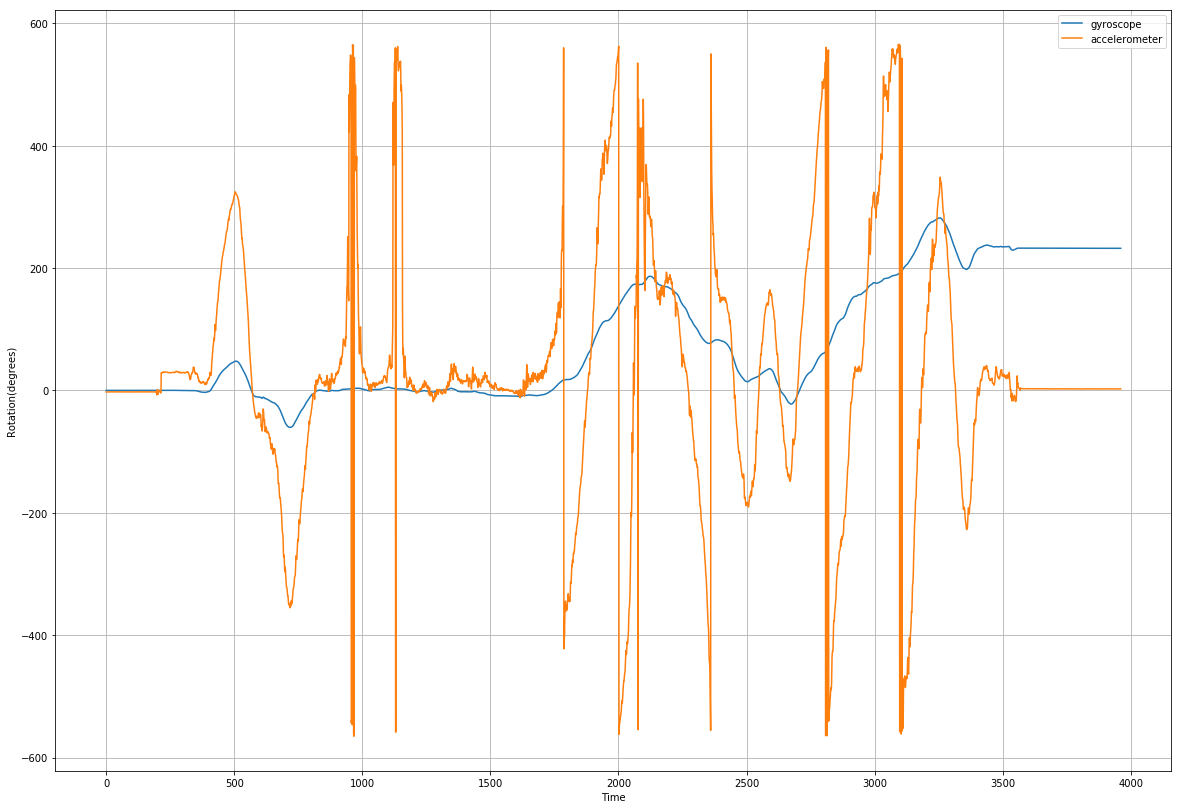

In [168]:
fig = plt.figure(figsize=(20, 14))
plt.plot(t,gxi,t,roll)
plt.grid(which="Both")
plt.legend(["gyroscope","accelerometer"])
plt.xlabel("Time")
plt.ylabel("Rotation(degrees)")

In [200]:

#pitch =  180.0 * np.arctan2(ax, np.sqrt(ay*ay + az*az))/np.pi
#roll  = 180.0 * np.arctan( ay/np.sqrt(ax*ax + az*az))/np.pi

Text(0,0.5,'Rotation(degrees)')

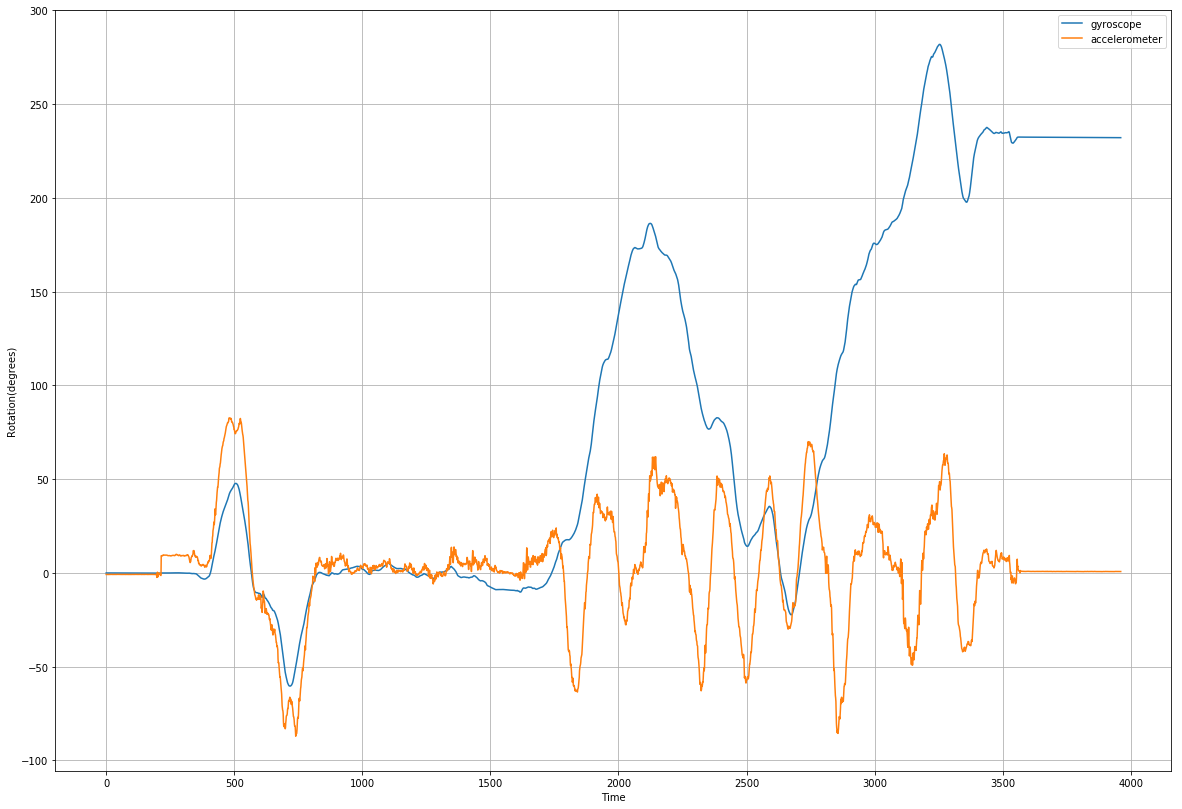

In [204]:
fig = plt.figure(figsize=(20, 14))
plt.plot(t,gxi,t,roll)
plt.grid(which="Both")
plt.legend(["gyroscope","accelerometer"])
plt.xlabel("Time")
plt.ylabel("Rotation(degrees)")

Text(0,0.5,'Rotation(degrees)')

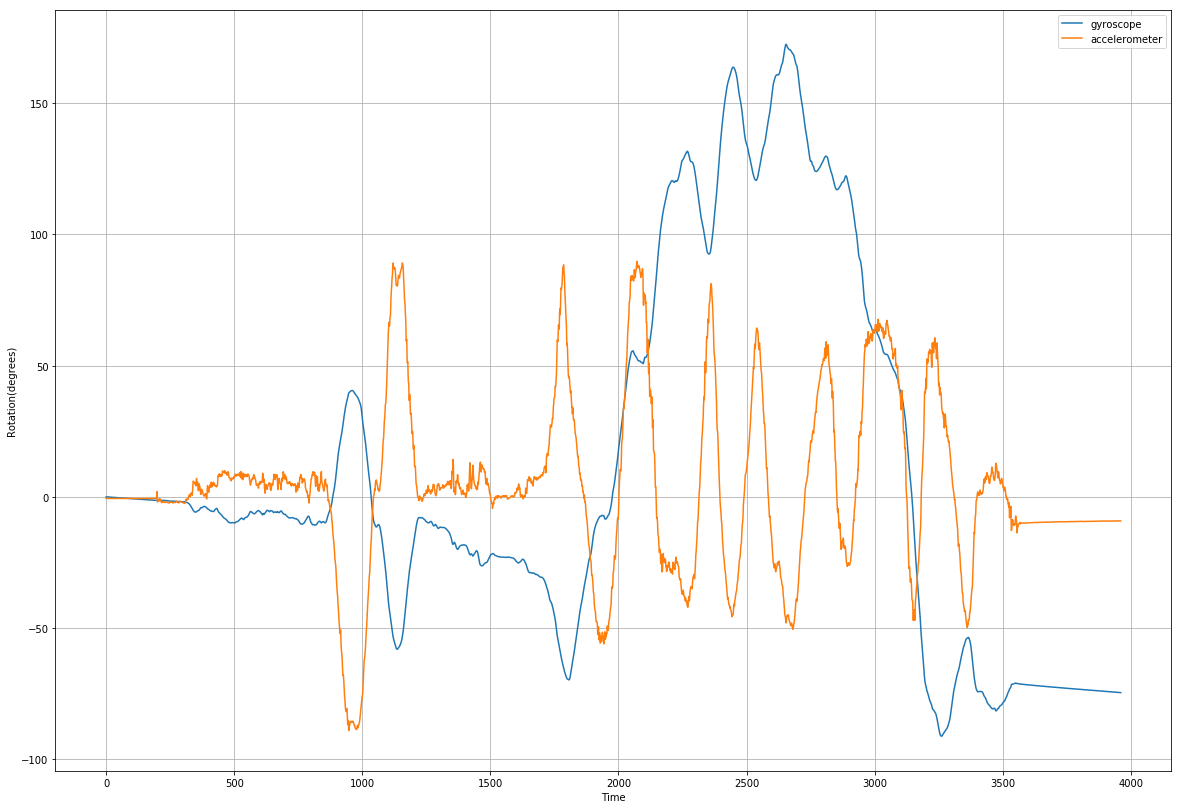

In [207]:
fig = plt.figure(figsize=(20, 14))
plt.plot(t,gyi,t,pitch)
plt.grid(which="Both")
plt.legend(["gyroscope","accelerometer"])
plt.xlabel("Time")
plt.ylabel("Rotation(degrees)")